<a href="https://colab.research.google.com/github/bbash/ArewaDS-Deep-Learning/blob/main/week_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### Name: Bashir Salisu Abubakar

### Email: bsalisu2016@gmail.com

### Title: Week 2 Solution

### **Exercises Solution**

In [1204]:
# import libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

In [1205]:
# set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"The device is: {device}")

The device is: cuda


1. Create a straight line dataset using the linear regression formula (weight * X + bias).

In [1206]:
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total

weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)

y = weight * X + bias

len(X), len(y), X.shape, y.shape

(100, 100, torch.Size([100, 1]), torch.Size([100, 1]))

In [1207]:
# Split the data into 80% training, 20% testing.
train_size = int(0.8 * len(X))

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:],y[train_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [1208]:
### Plot the training and testing data so it becomes visual
def plot_visual(train_data = X_train,
                train_label = y_train,
                test_data = X_test,
                test_label = y_test,
                prediction = None):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_label, c ='b', s= 4, label = 'Train_data')
    plt.scatter(test_data, test_label,c ='r', s =4, label ='Test_data')

    if prediction is not None:
               plt.scatter(test_data, prediction, c='g', s =4, label='Prediction')

    plt.legend(prop={"size": 14});

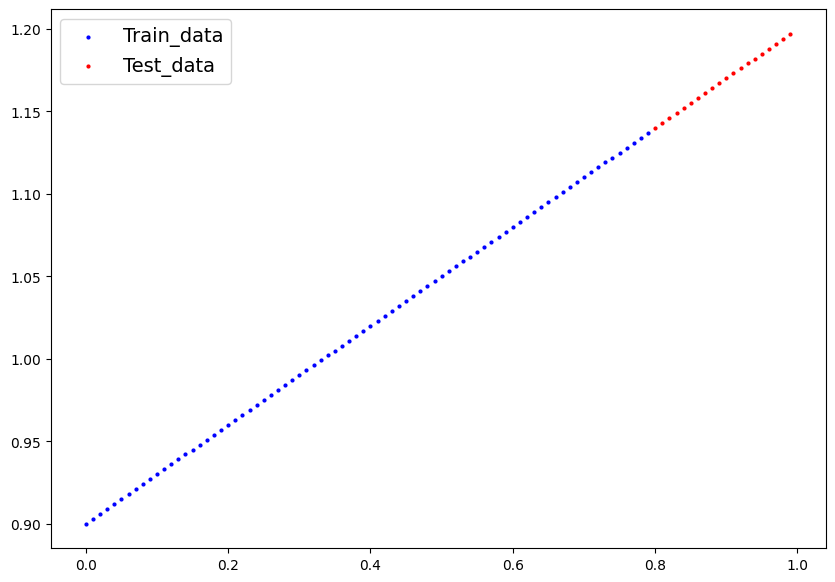

In [1209]:
plot_visual()

### 2. Build a PyTorch model by subclassing nn.Module.

In [1210]:
# nside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

class Model_01(nn.Module):

    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(
            torch.randn(1, dtype=torch.float),
            requires_grad=True
        )
        self.bias = nn.Parameter(
            torch.randn(1, dtype=torch.float),
            requires_grad=True
        )
    def forward(self, X):
        return self.weight * X + self.bias

In [1211]:
# Once you've constructed the model, make an instance of it and check its state_dict()

torch.manual_seed(42)

model = Model_01().to(device)

model.state_dict()


OrderedDict([('weight', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

### 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively

In [1212]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer (lr = 0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [1213]:
torch.manual_seed(42)

# Write a training loop to perform the appropriate training steps for 300 epochs.
Epochs = 300

# put train and test data into device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(Epochs):

    model.train()

    # fit data
    yhat = model(X_train)

    # calculate loss
    loss = loss_fn(yhat, y_train)

    #grad_zero
    optimizer.zero_grad()

    # backward prop
    loss.backward()

    # opimizer
    optimizer.step()

    model.eval()

    with torch.inference_mode():

        test_yhat = model(X_test)

        test_loss = loss_fn(test_yhat, y_test)

        if epoch % 20  == 0:
            print(f"At Epoch: {epoch}, Training loss: {loss:.3f} and Test loss {test_loss:.3f}")


At Epoch: 0, Training loss: 0.757 and Test loss 0.725
At Epoch: 20, Training loss: 0.525 and Test loss 0.454
At Epoch: 40, Training loss: 0.294 and Test loss 0.183
At Epoch: 60, Training loss: 0.077 and Test loss 0.073
At Epoch: 80, Training loss: 0.053 and Test loss 0.116
At Epoch: 100, Training loss: 0.046 and Test loss 0.105
At Epoch: 120, Training loss: 0.039 and Test loss 0.089
At Epoch: 140, Training loss: 0.032 and Test loss 0.074
At Epoch: 160, Training loss: 0.025 and Test loss 0.058
At Epoch: 180, Training loss: 0.018 and Test loss 0.042
At Epoch: 200, Training loss: 0.011 and Test loss 0.026
At Epoch: 220, Training loss: 0.004 and Test loss 0.009
At Epoch: 240, Training loss: 0.004 and Test loss 0.006
At Epoch: 260, Training loss: 0.004 and Test loss 0.006
At Epoch: 280, Training loss: 0.004 and Test loss 0.006


In [1214]:
model.state_dict()

OrderedDict([('weight', tensor([0.3067], device='cuda:0')),
             ('bias', tensor([0.9011], device='cuda:0'))])

### 4. Make predictions with the trained model on the test data.

In [1215]:
model.eval()

with torch.inference_mode():
    yhat = model(X_test)

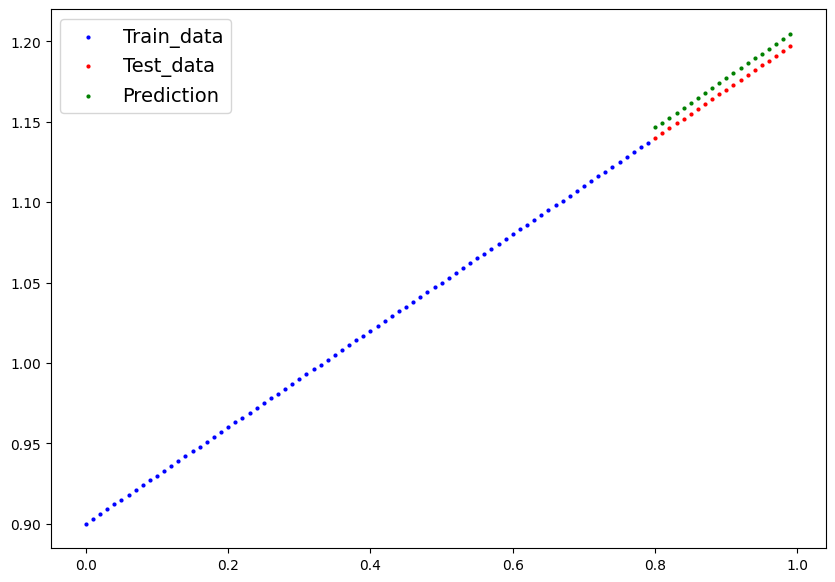

In [1216]:
plot_visual(prediction=yhat.cpu())

### Save your trained model's state_dict() to file.

In [1217]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [1218]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = Model_01()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
Model_01()
Model on device:
cuda:0


In [1219]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
yhat == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Advanced Assignment

In [1220]:
# import libraries
import zipfile
import pandas as pd

In [1221]:
# download dataset in colab env
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip

--2023-12-27 00:28:12--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.04s   

2023-12-27 00:28:12 (374 KB/s) - ‘data.zip’ saved [14713]



In [1222]:
# unzip data
with zipfile.ZipFile("data.zip", 'r') as my_zip:
    my_zip.extractall()


In [1223]:
# read csv and parse to pandas
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=";", thousands=',')
data.columns

Index(['Iy', 'PF', 'e', 'dIf', 'If'], dtype='object')

In [1224]:
 # get numpy data
numpy_data = data.values

## Question 1

In [1225]:
# Question b: Convert the Numpy array to PyTorch tensor, original data tensor.
original_data_tensor = torch.from_numpy(numpy_data)#.type(torch.float)
original_data_tensor

tensor([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        ...,
        [   6,   95,    5,   16,  134],
        [   6,   97,    3,   16,  134],
        [   6,   99,    1,   16,  134]])

## Question 2 : Art of 'Tensor Manipulation'

In [1226]:
# Question a: print the size of the dataset
print(f"The size of the dataset is {original_data_tensor.size()}")

The size of the dataset is torch.Size([557, 5])


In [1227]:
# Question b: Create a tensor, my pi tensor of same size as original
# data tensor containing values of 3.142 at every point and placed on
# your GPU device. Print the first 13 rows. Print tensor device location.
# Print tensor datatype.
row = original_data_tensor.shape[0]
col = original_data_tensor.shape[1]
my_pi_tensor = torch.ones(size = (row,col), device=device) * 3.142
print(f"The first 13 rows: {my_pi_tensor[:13]}")
print(f"The tensor device location: {my_pi_tensor.device}")
print(f"The tensor type is: {my_pi_tensor.dtype}")

The first 13 rows: tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]], device='cuda:0')
The tensor device location: cuda:0
The tensor type is: torch.float32


In [1228]:
# Question c: Print the fifth-root of the sum of all values in
# my pi tensor.
# fifth-root can be represented as number ** (0.2)
sum_of_values = torch.sum(my_pi_tensor).item() ** 0.2
print(f"The fifthe-root of the sum of all values is: {sum_of_values:.3f}")

The fifthe-root of the sum of all values is: 6.143


In [1229]:
# Question d: Create a new tensor, my data tensor using the first and
# last 100 rows from the original data tensor. Print size of my
# data tensor [Expect a size of 200 rows].
first_hundred = original_data_tensor[:100]
print(len(first_hundred))
last_hundred = original_data_tensor[457:]
print(len(last_hundred))
my_data_tensor = torch.cat([first_hundred, last_hundred], dim =0)
print(my_data_tensor.shape)
my_data_tensor[:5]

100
100
torch.Size([200, 5])


tensor([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        [   3,   72,   28,  338, 1518],
        [   3,   74,   26,  317, 1497]])

In [1230]:
# Question e: Create two 1-D tensors, features and target from my data
# tensor. The feature is dIf (Changing of excitation current of
# synchronous machine) I) column and target is If (Excitation current
# of synchronous machine).

x = my_data_tensor[:,3].unsqueeze(dim=1)
y = my_data_tensor[:,4].unsqueeze(dim=1)
len(x), len(y)

(200, 200)

In [1231]:
# Question f: Split your data into training and test data of ratio 75:25 respectively
train_size = int(0.75 * len(x))
x_train, y_train = x[:train_size].type(torch.float).to(device), y[:train_size].type(torch.float).to(device)
x_test, y_test = x[train_size:].type(torch.float).to(device), y[train_size:].type(torch.float).to(device)

#len(x_train), len(y_train), len(x_test), len(y_test)
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

(torch.float32, torch.float32, torch.float32, torch.float32)

# Part 2 Pytorch Workflow Fundamentals

## Question 3: Define your Linear model structure. You can use existing model.


In [1232]:
# model
class AdvancedAssignmentModel(nn.Module):
    def __init__(self):
        super().__init__()


        self.layer_1 = nn.Linear(in_features=1,
                                 out_features=8)

        self.layer_2 = nn.Linear(in_features=8,
                                 out_features=1)
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [1233]:
# initialize model
torch.manual_seed(42)
model_Assig = AdvancedAssignmentModel().to(device)
list(model_Assig.parameters())

[Parameter containing:
 tensor([[ 0.7645],
         [ 0.8300],
         [-0.2343],
         [ 0.9186],
         [-0.2191],
         [ 0.2018],
         [-0.4869],
         [ 0.5873]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.8815, -0.7336,  0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[ 0.2725,  0.0523, -0.1651,  0.0901, -0.1629, -0.0415, -0.1436,  0.2345]],
        device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.2791], device='cuda:0', requires_grad=True)]

In [1234]:
model_Assig.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.8815, -0.7336,  0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412],
                     device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2725,  0.0523, -0.1651,  0.0901, -0.1629, -0.0415, -0.1436,  0.2345]],
                     device='cuda:0')),
             ('layer_2.bias', tensor([-0.2791], device='cuda:0'))])

In [1235]:
# loss and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_Assig.parameters(), lr = 0.001)

### Question 4: Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model training and testing. Choose any set of hyperparameters for model training.

In [1236]:
torch.manual_seed(42)
Epochs = 1000
store_train_loss = []
store_test_loss = []
store_epoch = []

for epoch in range(Epochs):

    model_Assig.train()

    # fit
    yhat = model_Assig(x_train)

    # loss
    loss = loss_fn(yhat, y_train)

    optimizer.zero_grad()

    # backward prop
    loss.backward()

    #optimizer
    optimizer.step()

    model_Assig.eval()

    with torch.inference_mode():

        yhat_test = model_Assig(x_test)

        test_loss = loss_fn(yhat_test, y_test)

        if epoch % 10 == 0:
            store_train_loss.append(loss.detach().cpu().numpy())
            store_test_loss.append(test_loss.detach().cpu().numpy())
            store_epoch.append(epoch)
            print(f"Epoch {epoch}, Train loss: {loss:.2f}, Test loss: {test_loss:.2f}")

Epoch 0, Train loss: 1156.99, Test loss: 859.67
Epoch 10, Train loss: 437.43, Test loss: 429.38
Epoch 20, Train loss: 438.38, Test loss: 432.36
Epoch 30, Train loss: 439.13, Test loss: 418.07
Epoch 40, Train loss: 433.64, Test loss: 428.48
Epoch 50, Train loss: 433.92, Test loss: 429.59
Epoch 60, Train loss: 437.23, Test loss: 430.59
Epoch 70, Train loss: 437.28, Test loss: 430.98
Epoch 80, Train loss: 437.32, Test loss: 431.30
Epoch 90, Train loss: 437.33, Test loss: 431.55
Epoch 100, Train loss: 437.01, Test loss: 430.87
Epoch 110, Train loss: 437.00, Test loss: 431.01
Epoch 120, Train loss: 436.98, Test loss: 431.11
Epoch 130, Train loss: 436.95, Test loss: 431.17
Epoch 140, Train loss: 436.58, Test loss: 430.33
Epoch 150, Train loss: 436.22, Test loss: 429.47
Epoch 160, Train loss: 435.85, Test loss: 428.58
Epoch 170, Train loss: 435.47, Test loss: 427.68
Epoch 180, Train loss: 435.10, Test loss: 426.77
Epoch 190, Train loss: 437.90, Test loss: 434.42
Epoch 200, Train loss: 437.52,

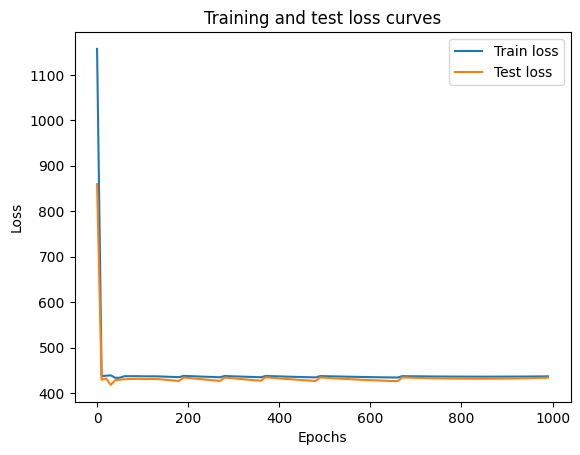

In [1237]:
# Plot the loss curves
plt.plot(store_epoch, store_train_loss, label="Train loss")
plt.plot(store_epoch, store_test_loss, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();